In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator

In [2]:
# keep zeros before int when loading txt file
names = ['data']
df_ = df = pd.read_csv('./output_waves.txt', 
                       sep="\s+", names=names, dtype={'data':str})

In [3]:
range_t = np.arange(0,200000,20)

In [4]:
lvds = []
v_start = []
v_stop = []
g_in = []
v_out = []
trg_led_out = []

for t in range(len(df_)):
    g_in.append(df_['data'][t][5])             #5 G_IN ext input
    
    v_stop.append(df_['data'][t][4])           #4 veto stop
    v_start.append(df_['data'][t][3])          #3 veto start
    v_out.append(df_['data'][t][2])            #2 Veto out 
    trg_led_out.append(df_['data'][t][1])      #1 TRG LED out
    
    lvds.append(1 - int(df_['data'][t][0])) #0 LVDS input 

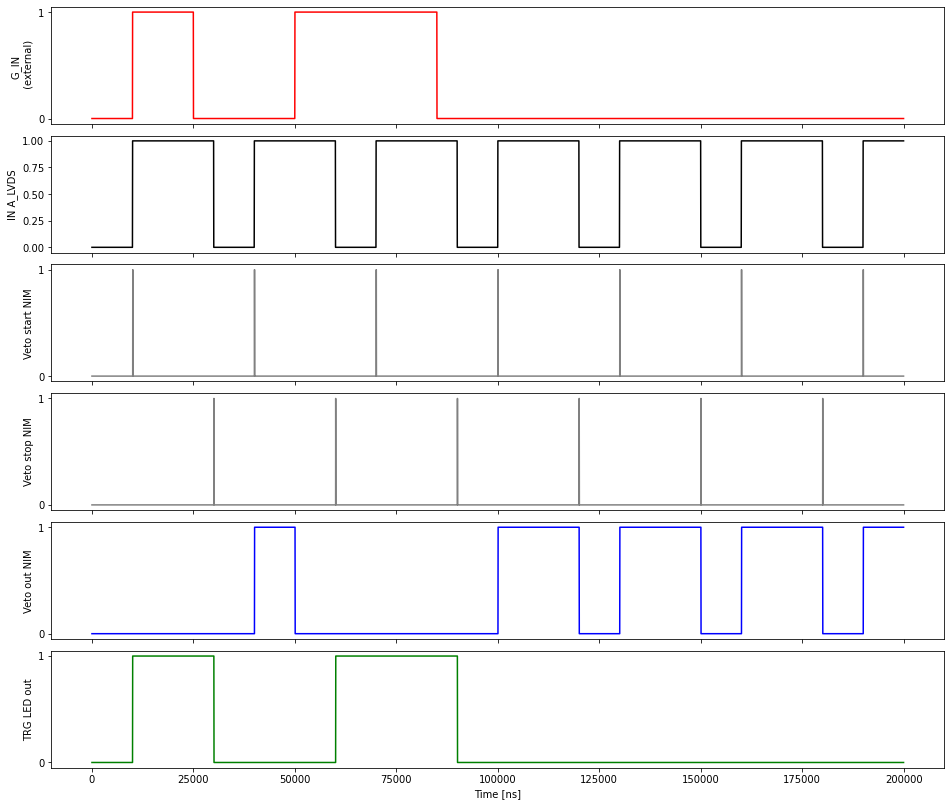

In [5]:
fig = plt.figure(figsize=(16,14),facecolor = 'w')
grid = plt.GridSpec(6, 4, wspace = 0.4, hspace = 0.1)


ax0 = plt.subplot(grid[0:1, :4])
ax0.plot(range_t, g_in, 'r')
ax0.set_xticklabels([])
ax0.set_ylabel('G_IN \n (external)')

ax1 = plt.subplot(grid[1:2, :4])
ax1.plot(range_t, lvds, 'k')
ax1.set_xticklabels([])
ax1.set_ylabel('IN A_LVDS')

ax2 = plt.subplot(grid[2:3, :4])
ax2.plot(range_t, v_start, 'grey')
ax2.set_xticklabels([])
ax2.set_ylabel('Veto start NIM')

ax3 = plt.subplot(grid[3:4, :4])
ax3.plot(range_t, v_stop, 'grey')
ax3.set_xticklabels([])
ax3.set_ylabel('Veto stop NIM')

ax4 = plt.subplot(grid[4:5, :4])
ax4.plot(range_t, v_out, 'b')
ax4.set_xticklabels([])
ax4.set_ylabel('Veto out NIM')

ax5 = plt.subplot(grid[5:6, :4])
ax5.plot(range_t, trg_led_out, 'g')
ax5.set_ylabel('TRG LED out')
ax5.set_xlabel('Time [ns]')
plt.show()